# Depression, Anxiety, & Stress estimation using AI and Data Science


# Using DASS 42 Questionnaire

Data Cleaning and Preprocessing

In [79]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os


In [80]:
data=pd.read_csv('C:/Users/hp/Downloads/DSAIdata.csv')
data.head()

,Timestamp,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,...,Q38A,Q39A,Q40A,Q41A,Q42A,gender,Please record your voice while speaking about your recent exam experience (Optional),Region,YearInCollege,RelationshipStatus
0,3-20-2023 18:57:08,3,2,4,1,3,3,4,3,4,...,3,4,4,2,2,2,NaN,Eastern India,3rd,One sided love
1,3-21-2023 20:03:29,1,1,1,1,1,1,1,1,2,...,2,1,1,1,2,1,NaN,Eastern India,1st,Single
2,3-21-2023 20:10:38,1,2,1,1,1,1,1,2,2,...,1,1,1,1,3,1,NaN,Northern India,1st,Committed
3,3-21-2023 20:13:54,4,2,2,2,2,4,3,3,4,...,4,4,4,4,4,2,NaN,Eastern India,3rd,Casually dating
4,3-21-2023 20:14:01,3,2,1,2,3,4,4,2,1,...,1,2,3,1,3,1,NaN,Northern India,2nd,Single


In [208]:
data_1=data.copy()
data_1=data_1.drop(data_1.iloc[:,0:1],axis=1)
data_2=data_1.copy()
data_2=data_2.drop(data_2.iloc[:,43:44],axis=1)

print('Shape',data_1.shape)
print('Attributes',data_1.columns)

Shape (595, 47)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'gender',
       'Please record your voice while speaking about your recent exam experience (Optional)',
       'Region', 'YearInCollege', 'RelationshipStatus'],
      dtype='object')


In [209]:
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,gender,Region,YearInCollege,RelationshipStatus
0,3,2,4,1,3,3,4,3,4,4,...,3,3,4,4,2,2,2,Eastern India,3rd,One sided love
1,1,1,1,1,1,1,1,1,2,2,...,1,2,1,1,1,2,1,Eastern India,1st,Single
2,1,2,1,1,1,1,1,2,2,1,...,1,1,1,1,1,3,1,Northern India,1st,Committed
3,4,2,2,2,2,4,3,3,4,3,...,3,4,4,4,4,4,2,Eastern India,3rd,Casually dating
4,3,2,1,2,3,4,4,2,1,1,...,1,1,2,3,1,3,1,Northern India,2nd,Single


In [210]:
data_1.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q38A,Q39A,Q40A,Q41A,Q42A,gender,Please record your voice while speaking about your recent exam experience (Optional),Region,YearInCollege,RelationshipStatus
0,3,2,4,1,3,3,4,3,4,4,...,3,4,4,2,2,2,NaN,Eastern India,3rd,One sided love
1,1,1,1,1,1,1,1,1,2,2,...,2,1,1,1,2,1,NaN,Eastern India,1st,Single
2,1,2,1,1,1,1,1,2,2,1,...,1,1,1,1,3,1,NaN,Northern India,1st,Committed
3,4,2,2,2,2,4,3,3,4,3,...,4,4,4,4,4,2,NaN,Eastern India,3rd,Casually dating
4,3,2,1,2,3,4,4,2,1,1,...,1,2,3,1,3,1,NaN,Northern India,2nd,Single


In [211]:
data_2=data_2.replace([np.inf, -np.inf], np.nan)
data_2=data_2.dropna()

In [212]:
new_data=data_2.iloc[:,42:]
data_3=data_2.filter(regex='Q\d{1,2}A')
data_3.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,3,2,4,1,3,3,4,3,4,4,...,3,3,4,4,3,3,4,4,2,2
1,1,1,1,1,1,1,1,1,2,2,...,2,2,1,1,1,2,1,1,1,2
2,1,2,1,1,1,1,1,2,2,1,...,1,1,1,1,1,1,1,1,1,3
3,4,2,2,2,2,4,3,3,4,3,...,4,3,4,4,3,4,4,4,4,4
4,3,2,1,2,3,4,4,2,1,1,...,1,2,2,1,1,1,2,3,1,3


Defining the Depression, Stress and Anxiety Sets

In [213]:
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3) 
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= data_3.filter(Dep)
stress = data_3.filter(Stress)
anxiety = data_3.filter(Anx)

Scoring as per given answers for the respective set of Depression,Anxiety,Stress questions

In [214]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

After scoring is done combining these three sets back with the the rest of the table

Therefore now have 3 dataframes to work with as of Depression,Anxiety,Stress

                                             Depression Set

In [215]:
depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,3,2,3,3,3,3,3,3,2,1,2,2,2,1,33
1,0,0,1,0,1,2,1,1,0,0,1,0,1,1,9
2,0,0,0,0,3,0,0,0,0,0,0,0,0,2,5
3,1,1,2,3,2,2,2,2,2,2,2,2,3,3,29
4,0,2,0,2,1,2,0,1,0,1,1,0,0,2,12


In [216]:
Depression=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count,gender,Region,YearInCollege,RelationshipStatus
0,3,2,3,3,3,3,3,3,2,1,2,2,2,1,33,2,Eastern India,3rd,One sided love
1,0,0,1,0,1,2,1,1,0,0,1,0,1,1,9,1,Eastern India,1st,Single
2,0,0,0,0,3,0,0,0,0,0,0,0,0,2,5,1,Northern India,1st,Committed
3,1,1,2,3,2,2,2,2,2,2,2,2,3,3,29,2,Eastern India,3rd,Casually dating
4,0,2,0,2,1,2,0,1,0,1,1,0,0,2,12,1,Northern India,2nd,Single


In [217]:
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>28:
        return 'Extremely Severe'

Depression['Condition']=Depression['Total_Count'].apply(condition)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count,gender,Region,YearInCollege,RelationshipStatus,Condition
0,3,2,3,3,3,3,3,3,2,1,2,2,2,1,33,2,Eastern India,3rd,One sided love,Extremely Severe
1,0,0,1,0,1,2,1,1,0,0,1,0,1,1,9,1,Eastern India,1st,Single,Normal
2,0,0,0,0,3,0,0,0,0,0,0,0,0,2,5,1,Northern India,1st,Committed,Normal
3,1,1,2,3,2,2,2,2,2,2,2,2,3,3,29,2,Eastern India,3rd,Casually dating,Extremely Severe
4,0,2,0,2,1,2,0,1,0,1,1,0,0,2,12,1,Northern India,2nd,Single,Mild


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'People Condition of Depression Level')

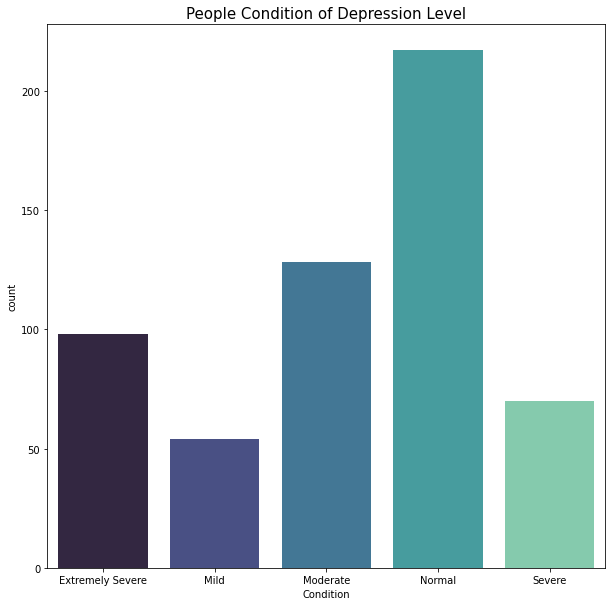

In [218]:
plt.figure(figsize=(10,10))
sns.countplot(Depression.sort_values('Condition').Condition,palette='mako')
plt.title('People Condition of Depression Level',fontsize=15)

In [219]:
Depr=Depression.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Depr['Condition']=Depr['Total_Count'].apply(condition)

Depr.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count,gender,Region,YearInCollege,RelationshipStatus,Condition
0,3,2,3,3,3,3,3,3,2,1,2,2,2,1,33,2,Eastern India,3rd,One sided love,4.0
1,0,0,1,0,1,2,1,1,0,0,1,0,1,1,9,1,Eastern India,1st,Single,0.0
2,0,0,0,0,3,0,0,0,0,0,0,0,0,2,5,1,Northern India,1st,Committed,0.0
3,1,1,2,3,2,2,2,2,2,2,2,2,3,3,29,2,Eastern India,3rd,Casually dating,4.0
4,0,2,0,2,1,2,0,1,0,1,1,0,0,2,12,1,Northern India,2nd,Single,1.0


<AxesSubplot:>

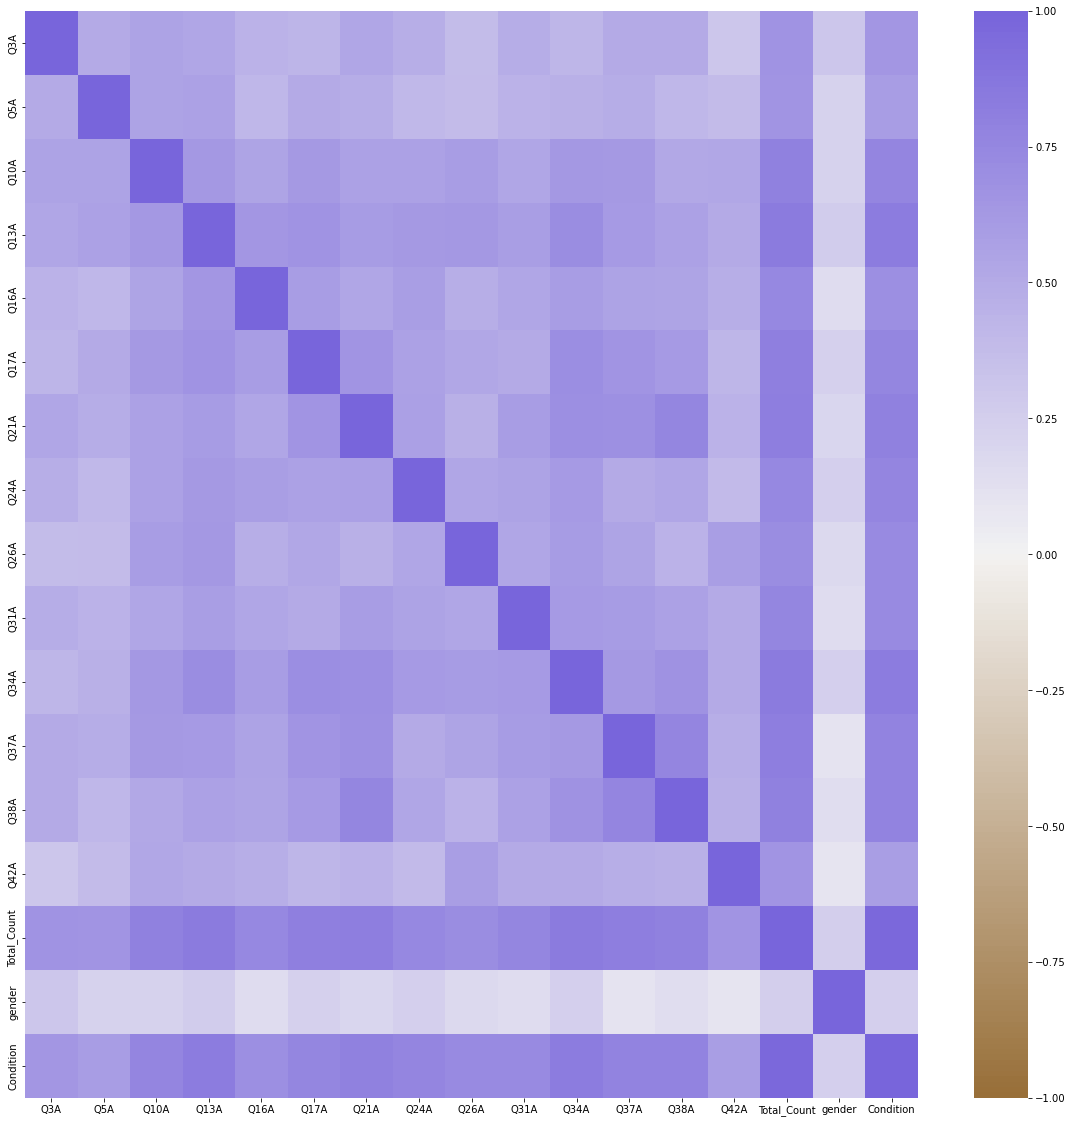

In [220]:
plt.figure(figsize=(20,20))
sns.heatmap(Depr.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(50,270,n=200))

                                                   Stress Set

In [221]:
stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,2,2,2,3,2,1,2,1,2,3,1,2,3,3,29
1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,3
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2
3,3,3,2,3,3,3,3,2,3,3,3,3,3,3,40
4,2,3,1,1,3,3,3,0,3,2,0,0,1,1,23


In [222]:
Stress=pd.merge(stress,new_data,how='inner',left_index=True,right_index=True)
Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count,gender,Region,YearInCollege,RelationshipStatus
0,2,2,2,3,2,1,2,1,2,3,1,2,3,3,29,2,Eastern India,3rd,One sided love
1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,3,1,Eastern India,1st,Single
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,1,Northern India,1st,Committed
3,3,3,2,3,3,3,3,2,3,3,3,3,3,3,40,2,Eastern India,3rd,Casually dating
4,2,3,1,1,3,3,3,0,3,2,0,0,1,1,23,1,Northern India,2nd,Single


In [223]:
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

Stress['Condition']=Stress['Total_Count'].apply(condition)

Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count,gender,Region,YearInCollege,RelationshipStatus,Condition
0,2,2,2,3,2,1,2,1,2,3,1,2,3,3,29,2,Eastern India,3rd,One sided love,Severe
1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,3,1,Eastern India,1st,Single,Normal
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,1,Northern India,1st,Committed,Normal
3,3,3,2,3,3,3,3,2,3,3,3,3,3,3,40,2,Eastern India,3rd,Casually dating,Extremely Severe
4,2,3,1,1,3,3,3,0,3,2,0,0,1,1,23,1,Northern India,2nd,Single,Moderate


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'People Condition for Stress Level')

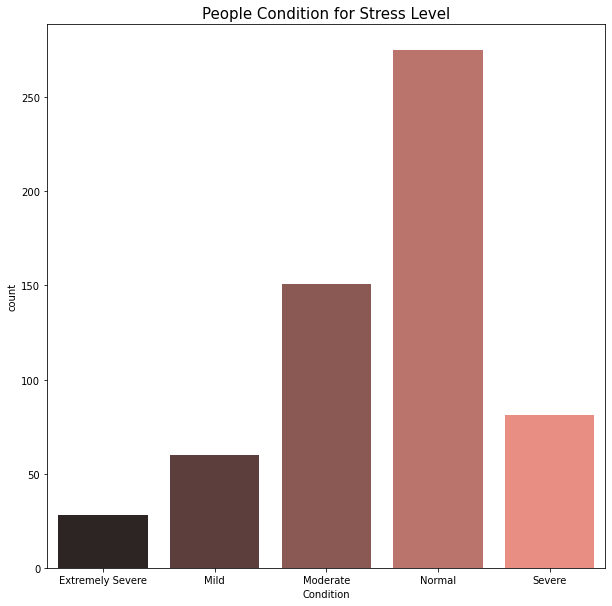

In [224]:
plt.figure(figsize=(10,10))
sns.countplot(Stress.sort_values('Condition').Condition,palette='dark:salmon')
plt.title('People Condition for Stress Level',fontsize=15)

In [225]:
Str=Stress.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Str['Condition']=Str['Total_Count'].apply(condition)

Str.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count,gender,Region,YearInCollege,RelationshipStatus,Condition
0,2,2,2,3,2,1,2,1,2,3,1,2,3,3,29,2,Eastern India,3rd,One sided love,4.0
1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,3,1,Eastern India,1st,Single,0.0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,1,Northern India,1st,Committed,0.0
3,3,3,2,3,3,3,3,2,3,3,3,3,3,3,40,2,Eastern India,3rd,Casually dating,4.0
4,2,3,1,1,3,3,3,0,3,2,0,0,1,1,23,1,Northern India,2nd,Single,3.0


<AxesSubplot:>

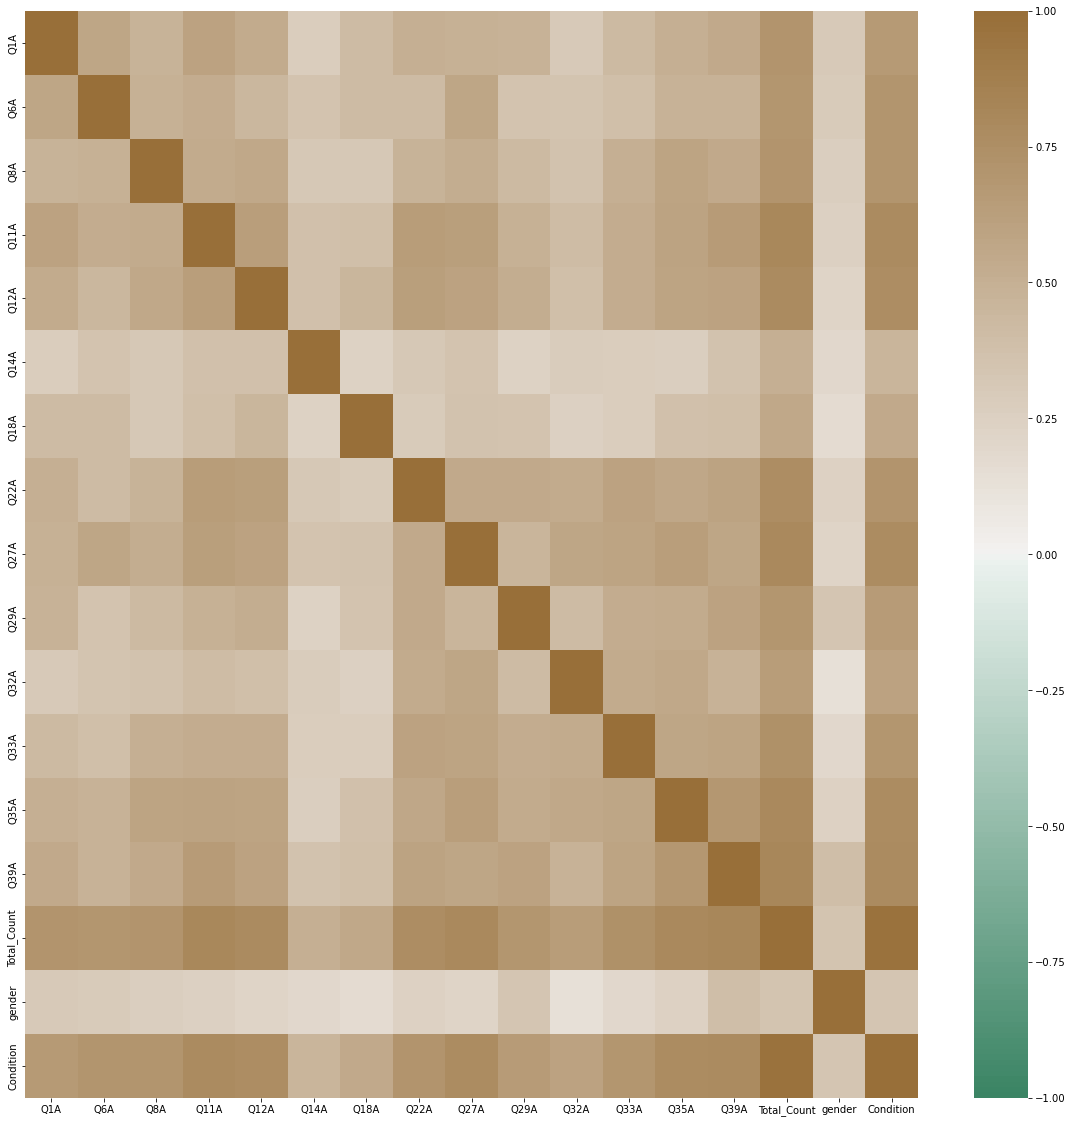

In [226]:
plt.figure(figsize=(20,20))
sns.heatmap(Str.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(150,50,n=200))

                                                     Anxiety Set

In [227]:
anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,1,0,3,3,2,3,3,3,2,1,2,3,3,1,30
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,3
3,1,1,2,3,2,2,3,2,2,3,3,3,3,3,33
4,1,1,3,0,0,1,0,0,1,2,2,0,2,0,13


In [228]:
Anxiety=pd.merge(anxiety,new_data,how='inner',left_index=True,right_index=True)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count,gender,Region,YearInCollege,RelationshipStatus
0,1,0,3,3,2,3,3,3,2,1,2,3,3,1,30,2,Eastern India,3rd,One sided love
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,Eastern India,1st,Single
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,3,1,Northern India,1st,Committed
3,1,1,2,3,2,2,3,2,2,3,3,3,3,3,33,2,Eastern India,3rd,Casually dating
4,1,1,3,0,0,1,0,0,1,2,2,0,2,0,13,1,Northern India,2nd,Single


In [229]:
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

Anxiety['Condition']=Anxiety['Total_Count'].apply(condition)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count,gender,Region,YearInCollege,RelationshipStatus,Condition
0,1,0,3,3,2,3,3,3,2,1,2,3,3,1,30,2,Eastern India,3rd,One sided love,Extremely Severe
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,Eastern India,1st,Single,Normal
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,3,1,Northern India,1st,Committed,Normal
3,1,1,2,3,2,2,3,2,2,3,3,3,3,3,33,2,Eastern India,3rd,Casually dating,Extremely Severe
4,1,1,3,0,0,1,0,0,1,2,2,0,2,0,13,1,Northern India,2nd,Single,Moderate


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'People Condition for Anxiety Level')

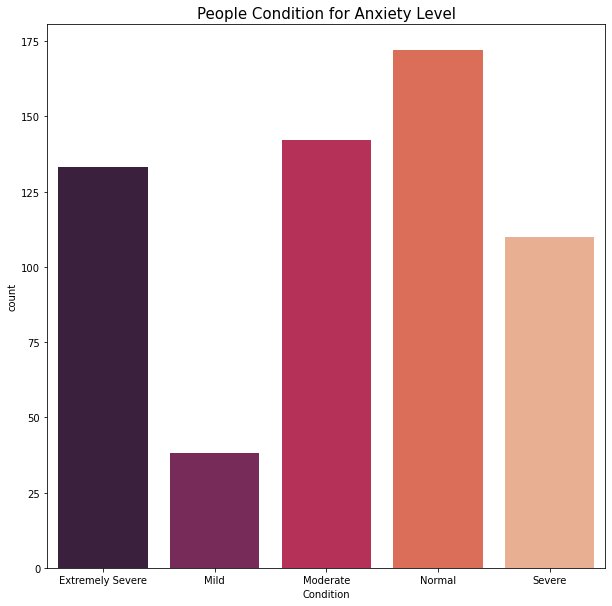

In [230]:
plt.figure(figsize=(10,10))
sns.countplot(Anxiety.sort_values('Condition').Condition,palette='rocket')
plt.title('People Condition for Anxiety Level',fontsize=15)

In [231]:
Anx=Anxiety.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Anx['Condition']=Anx['Total_Count'].apply(condition)

Anx.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count,gender,Region,YearInCollege,RelationshipStatus,Condition
0,1,0,3,3,2,3,3,3,2,1,2,3,3,1,30,2,Eastern India,3rd,One sided love,4.0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,Eastern India,1st,Single,0.0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,3,1,Northern India,1st,Committed,0.0
3,1,1,2,3,2,2,3,2,2,3,3,3,3,3,33,2,Eastern India,3rd,Casually dating,4.0
4,1,1,3,0,0,1,0,0,1,2,2,0,2,0,13,1,Northern India,2nd,Single,1.0


<AxesSubplot:>

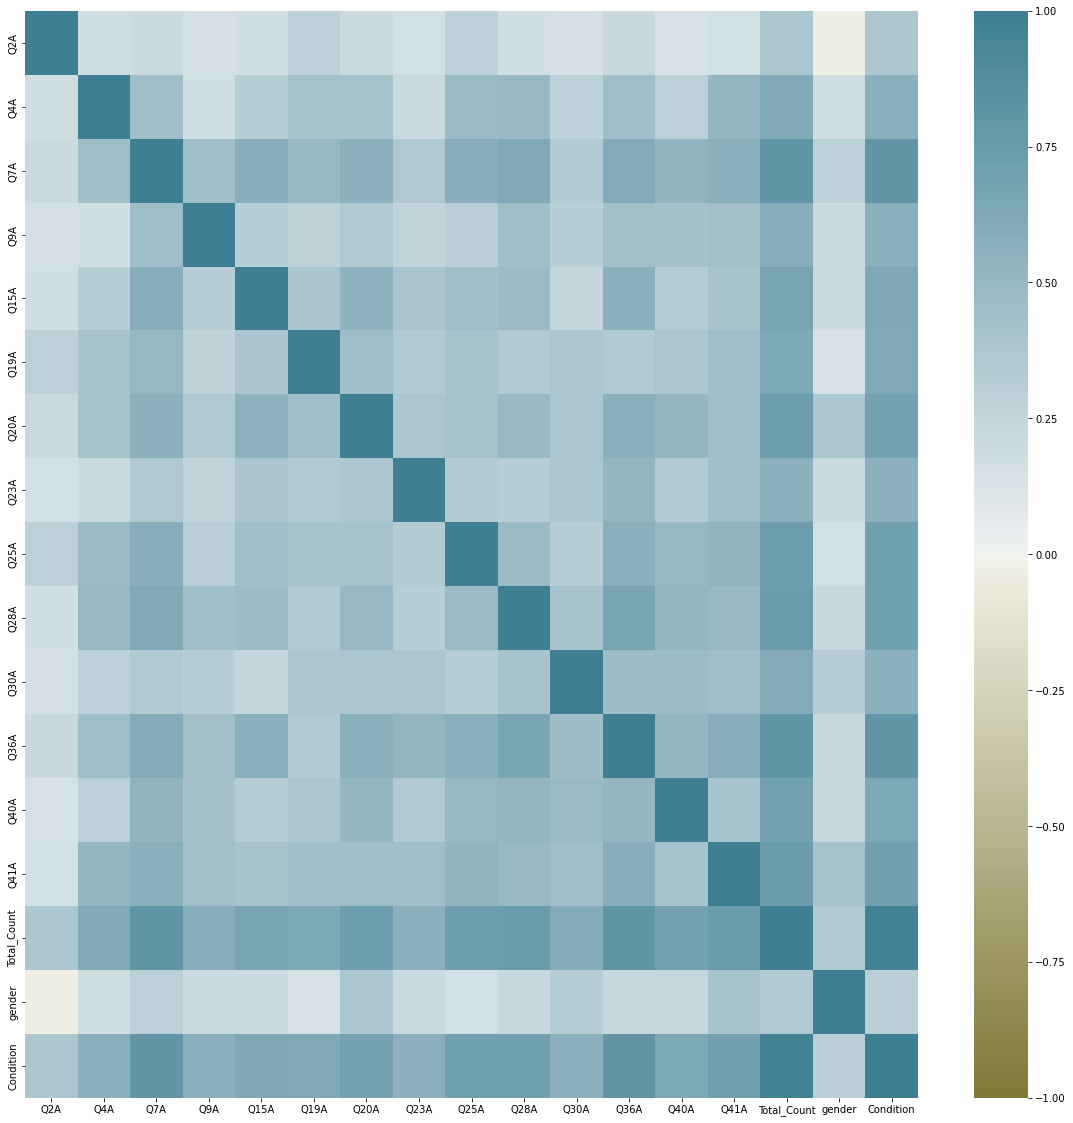

In [232]:
plt.figure(figsize=(20,20))
sns.heatmap(Anx.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(80,220,n=200))

Comparing different answers given for situations like gender, relationship status, year in college, region etc and comparing with their Anxiety, Depression or Stress Conditions



Genders

1=Male
2=Female
3=Other

In [233]:
print('Count of People participated as of Gender\n',data_2['gender'].value_counts())

Count of People participated as of Gender
 1    389
2    206
Name: gender, dtype: int64


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Depression Condition of Different Gender')

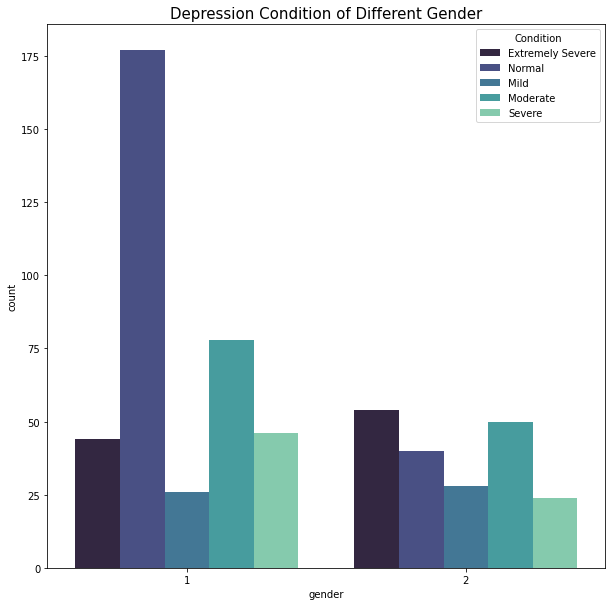

In [234]:
plt.figure(figsize=(10,10))
sns.countplot(Depression.sort_values('gender').gender,hue=Depression['Condition'],palette='mako')
plt.title('Depression Condition of Different Gender',fontsize=15)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Stress Condition of Different Gender')

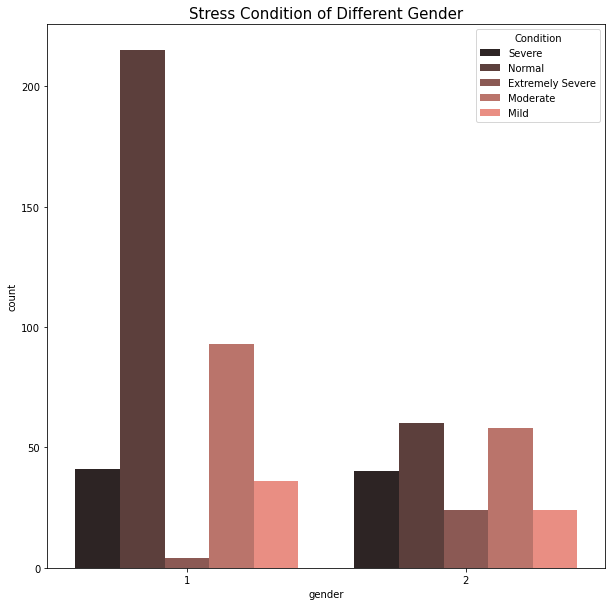

In [235]:
plt.figure(figsize=(10,10))
sns.countplot(Stress.sort_values('gender').gender,hue=Stress['Condition'],palette='dark:salmon')
plt.title('Stress Condition of Different Gender',fontsize=15)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Anxiety Condition of Different Gender')

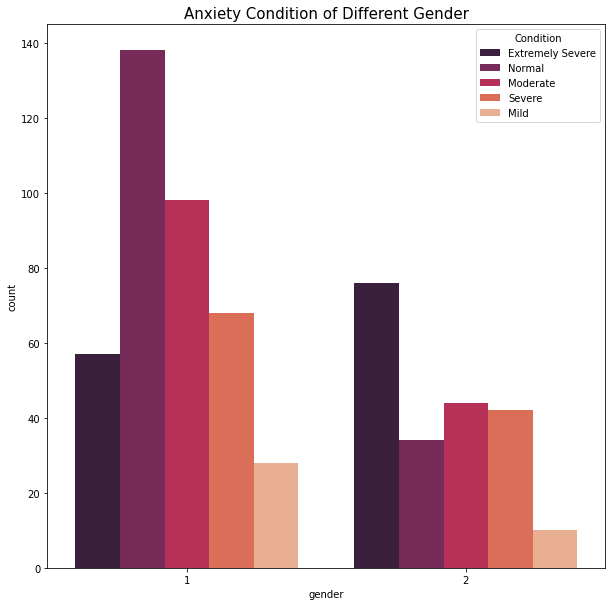

In [236]:
plt.figure(figsize=(10,10))
sns.countplot(Anxiety.sort_values('gender').gender,hue=Anxiety['Condition'],palette='rocket')
plt.title('Anxiety Condition of Different Gender',fontsize=15)


Relationship Status

1=Single 2=Commited 3=Casually dating 4=One sided love

In [237]:
Depression['RelationshipStatus'].value_counts()

Single             363
Committed          108
Casually dating     66
One sided love      58
Name: RelationshipStatus, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Depression State of People as of relationship status')

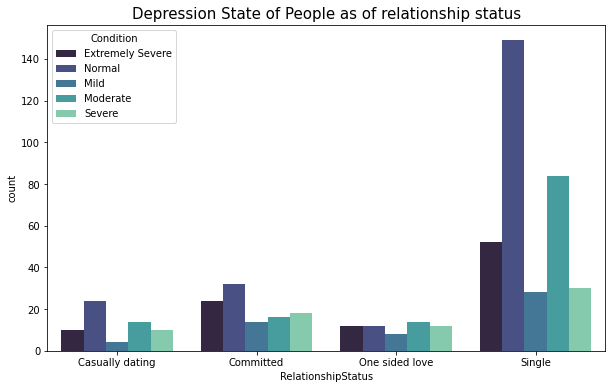

In [238]:
plt.figure(figsize=(10,6))
sns.countplot(Depression.sort_values('RelationshipStatus').RelationshipStatus,hue=Depression['Condition'],palette='mako')
plt.title('Depression State of People as of relationship status',fontsize=15)

In [239]:
Stress['RelationshipStatus'].value_counts()

Single             363
Committed          108
Casually dating     66
One sided love      58
Name: RelationshipStatus, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Stress State of People as of relationship status')

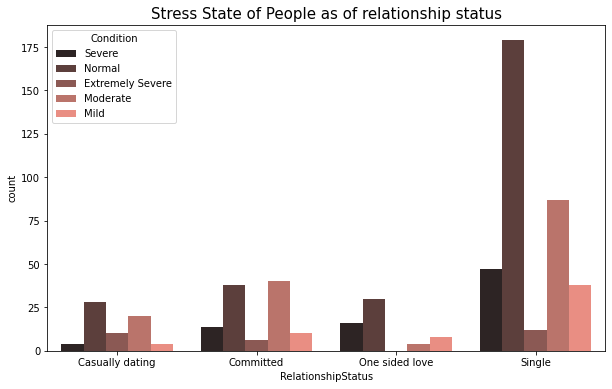

In [240]:
plt.figure(figsize=(10,6))
sns.countplot(Stress.sort_values('RelationshipStatus').RelationshipStatus,hue=Stress['Condition'],palette='dark:salmon')
plt.title('Stress State of People as of relationship status',fontsize=15)

In [241]:
Anxiety['RelationshipStatus'].value_counts()

Single             363
Committed          108
Casually dating     66
One sided love      58
Name: RelationshipStatus, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Anxiety State of People as of relationship status')

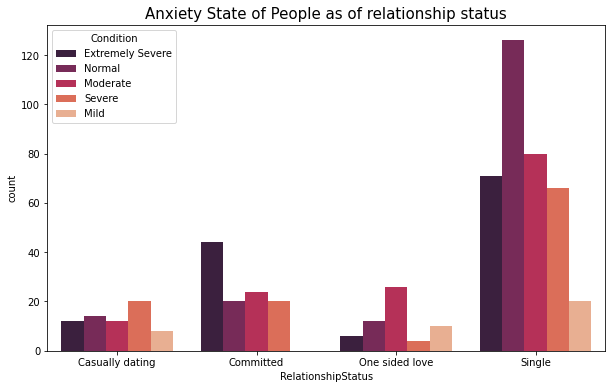

In [242]:
plt.figure(figsize=(10,6))
sns.countplot(Anxiety.sort_values('RelationshipStatus').RelationshipStatus,hue=Anxiety['Condition'],palette='rocket')
plt.title('Anxiety State of People as of relationship status',fontsize=15)



Year In College

1=1st year 2=2nd year 3=3rd year 4=Others

In [243]:
Depression['YearInCollege'].value_counts()

1st      282
3rd      160
2nd      107
Other     46
Name: YearInCollege, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Depression State of People as of year in college')

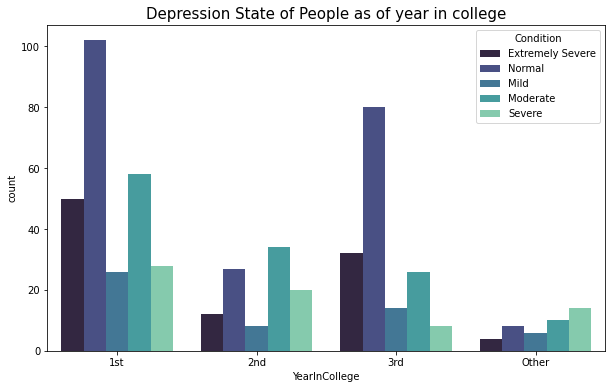

In [244]:
plt.figure(figsize=(10,6))
sns.countplot(Depression.sort_values('YearInCollege').YearInCollege,hue=Depression['Condition'],palette='mako')
plt.title('Depression State of People as of year in college',fontsize=15)

In [245]:
Stress['YearInCollege'].value_counts()

1st      282
3rd      160
2nd      107
Other     46
Name: YearInCollege, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Stress State of People as of year in college')

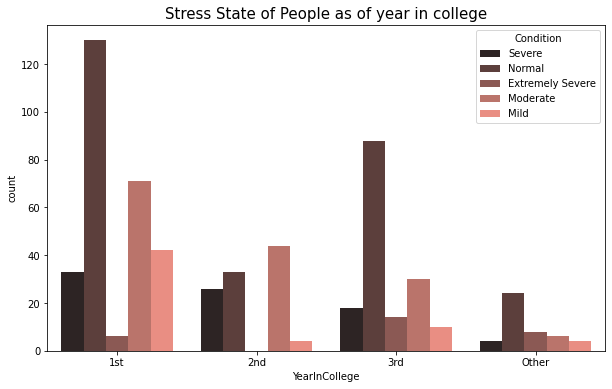

In [246]:
plt.figure(figsize=(10,6))
sns.countplot(Stress.sort_values('YearInCollege').YearInCollege,hue=Stress['Condition'],palette='dark:salmon')
plt.title('Stress State of People as of year in college',fontsize=15)

In [247]:
Anxiety['YearInCollege'].value_counts()

1st      282
3rd      160
2nd      107
Other     46
Name: YearInCollege, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Anxiety State of People as of year in college')

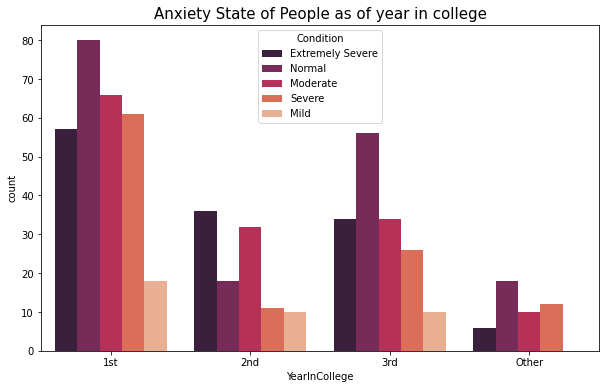

In [248]:
plt.figure(figsize=(10,6))
sns.countplot(Anxiety.sort_values('YearInCollege').YearInCollege,hue=Anxiety['Condition'],palette='rocket')
plt.title('Anxiety State of People as of year in college',fontsize=15)


Region

1=Eastern India 2=Northern India 3=Southern India 4=Western India 5=North-Eastern India

In [249]:
Depression['Region'].value_counts()

Eastern India          302
Northern India         113
Southern India          88
Western India           54
North-Eastern India     38
Name: Region, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Depression State of People as of region coming from')

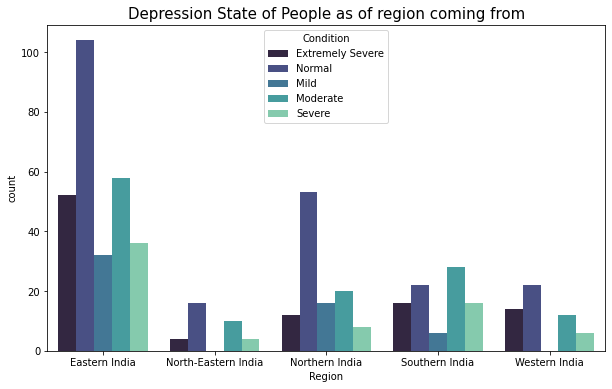

In [250]:
plt.figure(figsize=(10,6))
sns.countplot(Depression.sort_values('Region').Region,hue=Depression['Condition'],palette='mako')
plt.title('Depression State of People as of region coming from',fontsize=15)

In [251]:
Stress['Region'].value_counts()

Eastern India          302
Northern India         113
Southern India          88
Western India           54
North-Eastern India     38
Name: Region, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Stress State of People as of region coming from')

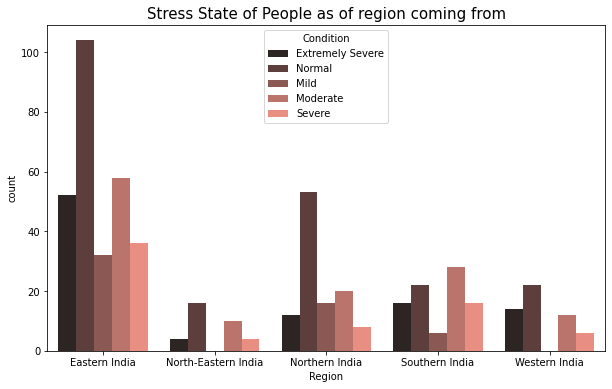

In [252]:
plt.figure(figsize=(10,6))
sns.countplot(Stress.sort_values('Region').Region,hue=Depression['Condition'],palette='dark:salmon')
plt.title('Stress State of People as of region coming from',fontsize=15)

In [253]:
Anxiety['Region'].value_counts()

Eastern India          302
Northern India         113
Southern India          88
Western India           54
North-Eastern India     38
Name: Region, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Anxiety State of People as of region coming from')

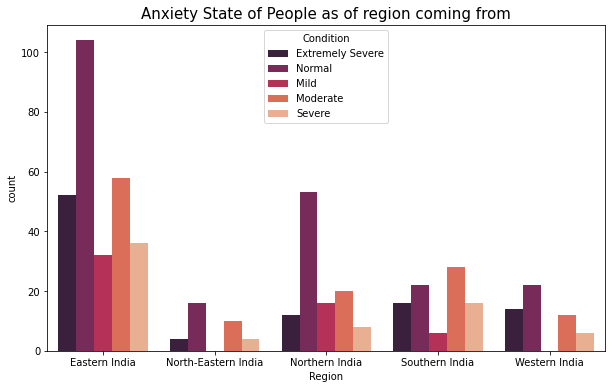

In [254]:
plt.figure(figsize=(10,6))
sns.countplot(Anxiety.sort_values('Region').Region,hue=Depression['Condition'],palette='rocket')
plt.title('Anxiety State of People as of region coming from',fontsize=15)

In [255]:
def change_var(x):
    if x=='Eastern India':
        return 0
    elif x=='North-Eastern India':
        return 1
    elif x=='Northern India':
        return 2
    elif x=='Southern India':
        return 3
    elif x=='Western India':
        return 4
    

    
Depression['Region']=Depression['Region'].apply(change_var)
Stress['Region']=Stress['Region'].apply(change_var)
Anxiety['Region']=Anxiety['Region'].apply(change_var)

In [256]:
def change_val(x):
    if x=='1st':
        return 1
    elif x=='2nd':
        return 2
    elif x=='3rd':
        return 3
    elif x=='Other':
        return 4
  
    

    
Depression['YearInCollege']=Depression['YearInCollege'].apply(change_val)
Stress['YearInCollege']=Stress['YearInCollege'].apply(change_val)
Anxiety['YearInCollege']=Anxiety['YearInCollege'].apply(change_val)

In [257]:
def differ_val(x):
    if x=='Single':
        return 1
    elif x=='Committed':
        return 2
    elif x=='Casually dating':
        return 3
    elif x=='One sided love':
        return 4
  
    

    
Depression['RelationshipStatus']=Depression['RelationshipStatus'].apply(differ_val)
Stress['RelationshipStatus']=Stress['RelationshipStatus'].apply(differ_val)
Anxiety['RelationshipStatus']=Anxiety['RelationshipStatus'].apply(differ_val)

In [258]:
Depression.columns

Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'Total_Count', 'gender',
       'Region', 'YearInCollege', 'RelationshipStatus', 'Condition'],
      dtype='object')

In [259]:
Stress.columns

Index(['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A', 'Total_Count', 'gender',
       'Region', 'YearInCollege', 'RelationshipStatus', 'Condition'],
      dtype='object')

In [260]:
Anxiety.columns

Index(['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A', 'Total_Count', 'gender',
       'Region', 'YearInCollege', 'RelationshipStatus', 'Condition'],
      dtype='object')

In [261]:
Depression=Depression.dropna()
Stress=Stress.dropna()
Anxiety=Anxiety.dropna()

In [262]:
Depression=Depression.drop(columns=['Total_Count', 'gender',
       'Region', 'YearInCollege', 'RelationshipStatus',])
Stress=Stress.drop(columns=['Total_Count', 'gender',
       'Region', 'YearInCollege', 'RelationshipStatus',])
Anxiety=Anxiety.drop(columns=['Total_Count', 'gender', 'Region',
       'YearInCollege', 'RelationshipStatus',])



Model Creation for predictions



In [263]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

                                                1. Model for Depression

In [264]:
scaler=MinMaxScaler()
X=Depression[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A']]
y=Depression[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [265]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (368, 14) (368, 1)
Test Set: (199, 14) (199, 1)


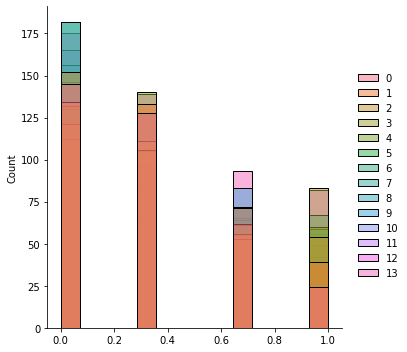

In [266]:
sns.displot(X_train_scaled)

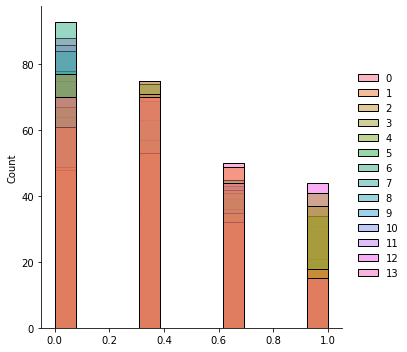

In [267]:
sns.displot(X_test_scaled)


Random Forest

C:\Users\hp\AppData\Local\Temp/ipykernel_16824/2261255524.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed whe

Cross Validation Score: 0.981
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000        37
            Mild     1.0000    1.0000    1.0000        17
        Moderate     1.0000    1.0000    1.0000        56
          Normal     1.0000    1.0000    1.0000        69
          Severe     1.0000    1.0000    1.0000        20

        accuracy                         1.0000       199
       macro avg     1.0000    1.0000    1.0000       199
    weighted avg     1.0000    1.0000    1.0000       199



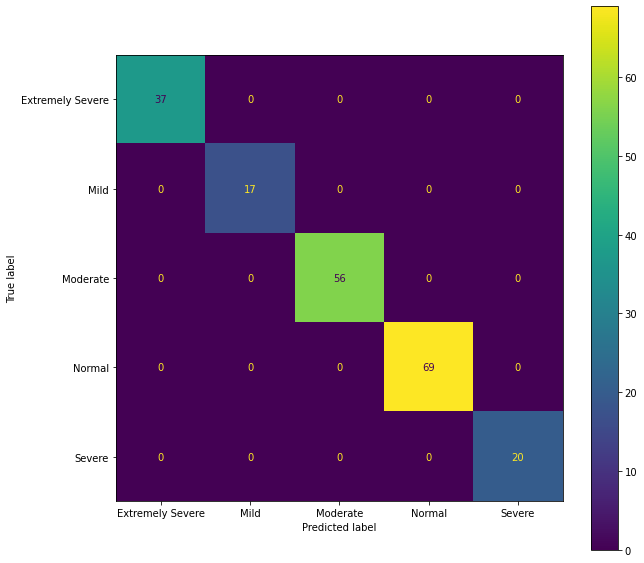

In [268]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor,X_test_scaled,y_test,ax=ax)

Decision Trees

Accuracy: 0.945
F1_Score: 0.943
Recall_Score: 0.945
Precision_Score: 0.945
Cross Validation Score: 0.899
                  precision    recall  f1-score   support

Extremely Severe     1.0000    0.9189    0.9577        37
            Mild     0.8571    0.7059    0.7742        17
        Moderate     0.9825    1.0000    0.9912        56
          Normal     0.9315    0.9855    0.9577        69
          Severe     0.8571    0.9000    0.8780        20

        accuracy                         0.9447       199
       macro avg     0.9256    0.9021    0.9118       199
    weighted avg     0.9448    0.9447    0.9435       199



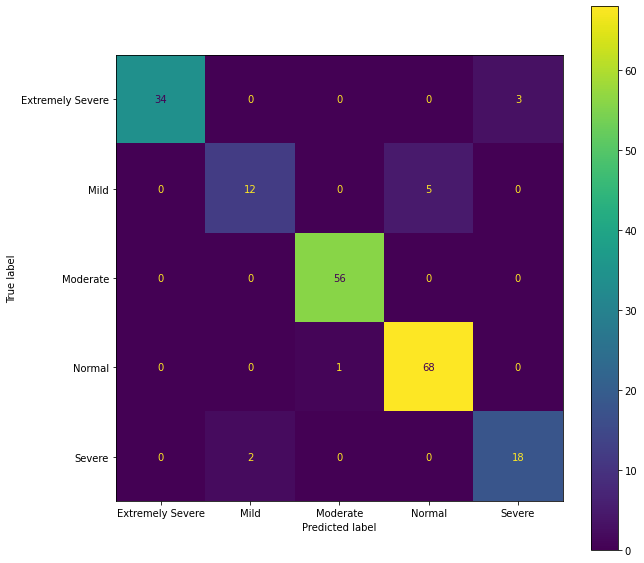

In [269]:
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train)
Acc_dt=round(accuracy_score(y_test,DT.predict(X_test_scaled)),3)
f1_dt=round(f1_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
recall_dt=round(recall_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
precision_dt=round(precision_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_dt)
print('F1_Score:',f1_dt)
print('Recall_Score:',recall_dt)
print('Precision_Score:',precision_dt)
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=DT.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(DT,X_test_scaled,y_test,ax=ax)

Gaussian Naive Bayes

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

Accuracy: 0.899
F1_Score: 0.901
Recall_Score: 0.899
Precision_Score: 0.922
Cross Validation Score: 0.897
                  precision    recall  f1-score   support

Extremely Severe     1.0000    0.7027    0.8254        37
            Mild     0.8235    0.8235    0.8235        17
        Moderate     0.9032    1.0000    0.9492        56
          Normal     1.0000    0.9130    0.9545        69
          Severe     0.6452    1.0000    0.7843        20

        accuracy                         0.8995       199
       macro avg     0.8744    0.8879    0.8674       199
    weighted avg     0.9220    0.8995    0.9007       199



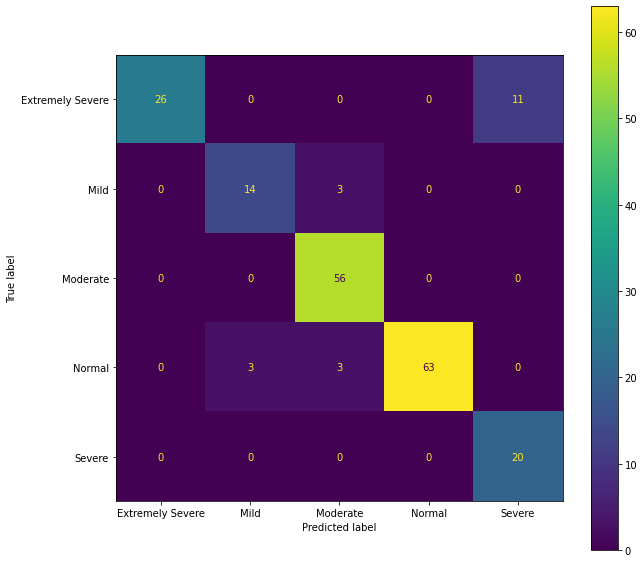

In [270]:
gb=GaussianNB().fit(X_train_scaled,y_train)
Acc_gb=round(accuracy_score(y_test,gb.predict(X_test_scaled)),3)
f1_gb=round(f1_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
recall_gb=round(recall_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
precision_gb=round(precision_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_gb)
print('F1_Score:',f1_gb)
print('Recall_Score:',recall_gb)
print('Precision_Score:',precision_gb)
print('Cross Validation Score:',round(np.mean(cross_val_score(gb, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=gb.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gb,X_test_scaled,y_test,ax=ax)

Nearest Neighbours

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Accuracy: 0.894
F1_Score: 0.894
Recall_Score: 0.894
Precision_Score: 0.893
Cross Validation Score: 0.875
                  precision    recall  f1-score   support

Extremely Severe     1.0000    0.9459    0.9722        37
            Mild     0.5625    0.5294    0.5455        17
        Moderate     0.8750    0.8750    0.8750        56
          Normal     0.9306    0.9710    0.9504        69
          Severe     0.9000    0.9000    0.9000        20

        accuracy                         0.8945       199
       macro avg     0.8536    0.8443    0.8486       199
    weighted avg     0.8933    0.8945    0.8936       199



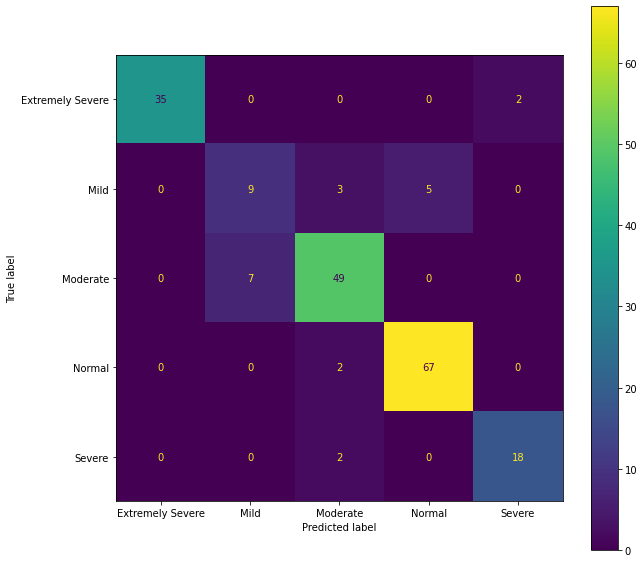

In [271]:
knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
Acc_knn=round(accuracy_score(y_test,knn.predict(X_test_scaled)),3)
f1_knn=round(f1_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
recall_knn=round(recall_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
precision_knn=round(precision_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_knn)
print('F1_Score:',f1_knn)
print('Recall_Score:',recall_knn)
print('Precision_Score:',precision_knn)
print('Cross Validation Score:',round(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=knn.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn,X_test_scaled,y_test,ax=ax)

Support Vector Machines

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0
Cross Validation Score: 0.997
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000        37
            Mild     1.0000    1.0000    1.0000        17
        Moderate     1.0000    1.0000    1.0000        56
          Normal     1.0000    1.0000    1.0000        69
          Severe     1.0000    1.0000    1.0000        20

        accuracy                         1.0000       199
       macro avg     1.0000    1.0000    1.0000       199
    weighted avg     1.0000    1.0000    1.0000       199



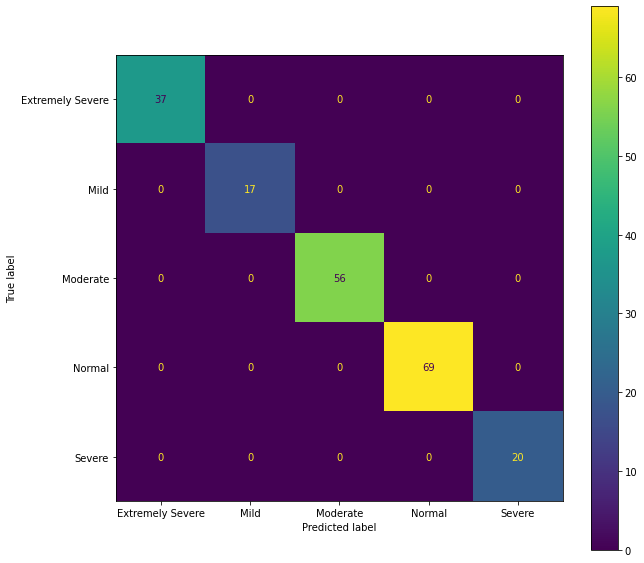

In [272]:
from sklearn.svm import SVC
svm=SVC(C=100,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
Acc_svm=round(accuracy_score(y_test,svm.predict(X_test_scaled)),3)
f1_svm=round(f1_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
recall_svm=round(recall_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
precision_svm=round(precision_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_svm)
print('F1_Score:',f1_svm)
print('Recall_Score:',recall_svm)
print('Precision_Score:',precision_svm)
print('Cross Validation Score:',round(np.mean(cross_val_score(svm, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=svm.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svm,X_test_scaled,y_test,ax=ax)

In [273]:
Result={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[Acc_ran*100,Acc_dt*100,Acc_gb*100,Acc_knn*100,Acc_svm*100],
                  'F1_Score(%)':[f1_ran*100,f1_dt*100,f1_gb*100,f1_knn*100,f1_svm*100],
                  'Precision(%)':[precision_ran*100,precision_dt*100,precision_gb*100,precision_knn*100,precision_svm*100],
                  'Recall(%)':[recall_ran*100,recall_dt*100,recall_gb*100,recall_knn*100,recall_svm*100],
                    }
Result_Depression=pd.DataFrame(Result)



                                           2. Model For Stress
                                           
                                           

In [274]:
Stress.columns

Index(['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A', 'Condition'],
      dtype='object')

In [275]:
scaler=MinMaxScaler()
X=Stress[['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A']]
y=Stress[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest

C:\Users\hp\AppData\Local\Temp/ipykernel_16824/2149205982.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran=RandomForestClassifier().fit(X_train_scaled,y_train)


Accuracy: 0.981
F1_Score: 0.982
Recall_Score: 0.981
Precision_Score: 0.984


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed whe

Cross Validation Score: 0.9896233974358974
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000        11
            Mild     0.8261    1.0000    0.9048        19
        Moderate     1.0000    1.0000    1.0000        51
          Normal     1.0000    0.9608    0.9800       102
          Severe     1.0000    1.0000    1.0000        26

        accuracy                         0.9809       209
       macro avg     0.9652    0.9922    0.9770       209
    weighted avg     0.9842    0.9809    0.9816       209



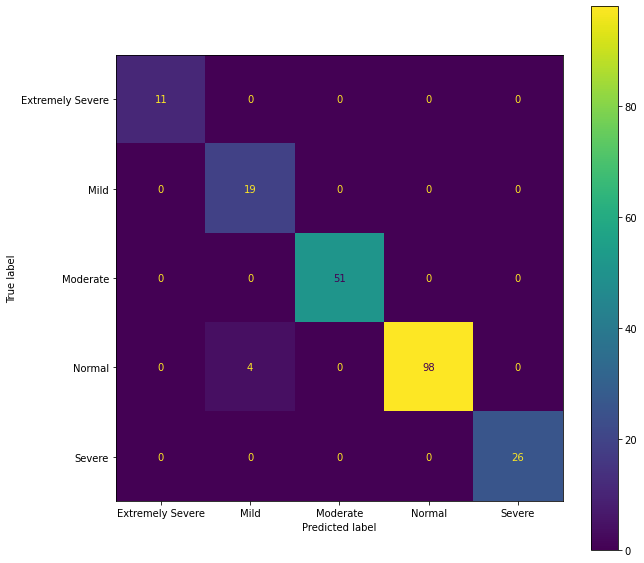

In [276]:
ran=RandomForestClassifier().fit(X_train_scaled,y_train)
acc_ran=round(accuracy_score(y_test,ran.predict(X_test_scaled)),3)
F1_ran=round(f1_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
prec_ran=round(precision_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
rec_ran=round(recall_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_ran)
print('F1_Score:',F1_ran)
print('Recall_Score:',rec_ran)
print('Precision_Score:',prec_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(ran, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(ran,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=ran.predict(X_test_scaled))
print(classification)

Decision Tree

Accuracy: 0.837
F1_Score: 0.841
Recall_Score: 0.837
Precision_Score: 0.858
Cross Validation Score: 0.8471955128205129
                  precision    recall  f1-score   support

Extremely Severe     0.8182    0.8182    0.8182        11
            Mild     0.4783    0.5789    0.5238        19
        Moderate     0.9744    0.7451    0.8444        51
          Normal     0.9100    0.8922    0.9010       102
          Severe     0.7222    1.0000    0.8387        26

        accuracy                         0.8373       209
       macro avg     0.7806    0.8069    0.7852       209
    weighted avg     0.8583    0.8373    0.8408       209



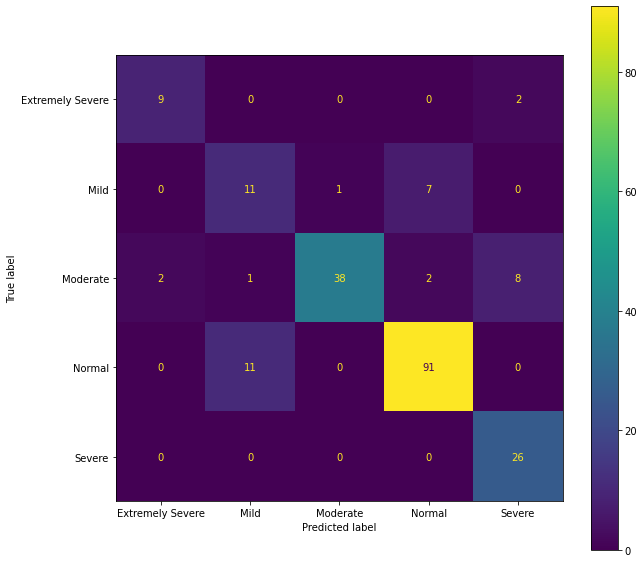

In [277]:
dt=DecisionTreeClassifier(criterion= 'entropy',max_depth= 80, min_samples_leaf= 9, min_samples_split=9).fit(X_train_scaled,y_train)
acc_dt=round(accuracy_score(y_test,dt.predict(X_test_scaled)),3)
F1_dt=round(f1_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
prec_dt=round(precision_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
rec_dt=round(recall_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_dt)
print('F1_Score:',F1_dt)
print('Recall_Score:',rec_dt)
print('Precision_Score:',prec_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(dt, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=dt.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(dt,X_test_scaled,y_test,ax=ax)

Gaussian Naive Bayes

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

Accuracy: 0.852
F1_Score: 0.858
Recall_Score: 0.852
Precision_Score: 0.879
Cross Validation Score: 0.8884615384615385
                  precision    recall  f1-score   support

Extremely Severe     0.7857    1.0000    0.8800        11
            Mild     0.5217    0.6316    0.5714        19
        Moderate     0.7302    0.9020    0.8070        51
          Normal     1.0000    0.8824    0.9375       102
          Severe     1.0000    0.7308    0.8444        26

        accuracy                         0.8517       209
       macro avg     0.8075    0.8293    0.8081       209
    weighted avg     0.8794    0.8517    0.8578       209



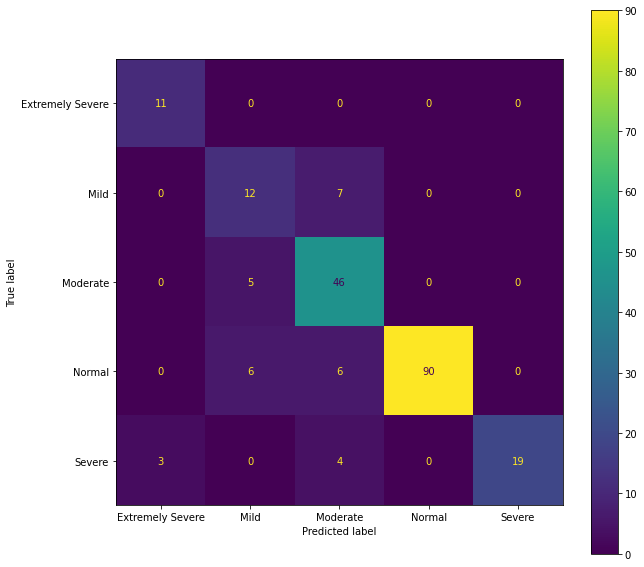

In [278]:
Gb=GaussianNB().fit(X_train_scaled,y_train)
acc_gb=round(accuracy_score(y_test,Gb.predict(X_test_scaled)),3)
F1_gb=round(f1_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
prec_gb=round(precision_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
rec_gb=round(recall_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_gb)
print('F1_Score:',F1_gb)
print('Recall_Score:',rec_gb)
print('Precision_Score:',prec_gb)
print('Cross Validation Score:',(np.mean(cross_val_score(Gb, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Gb,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Gb.predict(X_test_scaled))
print(classification)

Nearest Neighbors

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Accuracy: 0.89
F1_Score: 0.894
Recall_Score: 0.89
Precision_Score: 0.902
Cross Validation Score: 0.8884615384615385
                  precision    recall  f1-score   support

Extremely Severe     1.0000    0.8182    0.9000        11
            Mild     0.5217    0.6316    0.5714        19
        Moderate     0.8600    0.8431    0.8515        51
          Normal     1.0000    0.9412    0.9697       102
          Severe     0.8387    1.0000    0.9123        26

        accuracy                         0.8900       209
       macro avg     0.8441    0.8468    0.8410       209
    weighted avg     0.9023    0.8900    0.8938       209



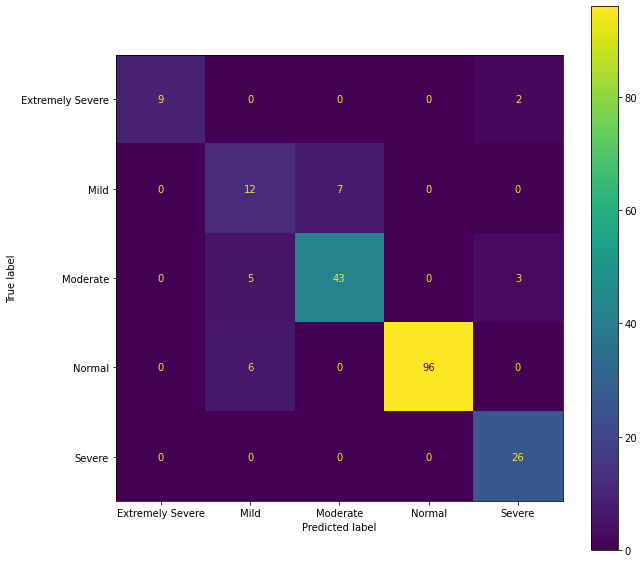

In [279]:
Knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
acc_knn=round(accuracy_score(y_test,Knn.predict(X_test_scaled)),3)
F1_knn=round(f1_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
prec_knn=round(precision_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
rec_knn=round(recall_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_knn)
print('F1_Score:',F1_knn)
print('Recall_Score:',rec_knn)
print('Precision_Score:',prec_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(Knn, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Knn,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Knn.predict(X_test_scaled))
print(classification)

Support Vector Machines

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Accuracy: 0.847
F1_Score: 0.8
Recall_Score: 0.847
Precision_Score: 0.835
Cross Validation Score: 0.8393429487179488


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

Extremely Severe     0.0000    0.0000    0.0000        11
            Mild     1.0000    0.1053    0.1905        19
        Moderate     0.7083    1.0000    0.8293        51
          Normal     1.0000    1.0000    1.0000       102
          Severe     0.6667    0.8462    0.7458        26

        accuracy                         0.8469       209
       macro avg     0.6750    0.5903    0.5531       209
    weighted avg     0.8347    0.8469    0.8005       209



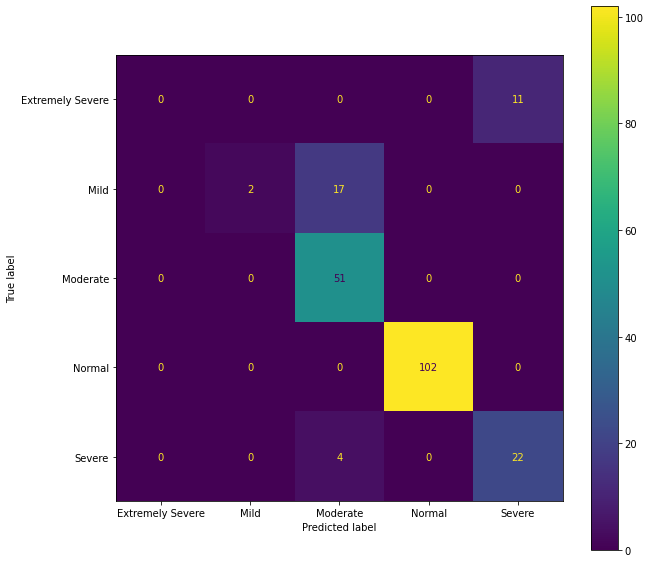

In [280]:
Svm=SVC(C=10, gamma=0.01, kernel='sigmoid').fit(X_train_scaled,y_train)
acc_svm=round(accuracy_score(y_test,Svm.predict(X_test_scaled)),3)
F1_svm=round(f1_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
prec_svm=round(precision_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
rec_svm=round(recall_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_svm)
print('F1_Score:',F1_svm)
print('Recall_Score:',rec_svm)
print('Precision_Score:',prec_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svm, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Svm,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svm.predict(X_test_scaled))
print(classification)

In [281]:
Result_1={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[acc_ran*100,acc_dt*100,acc_gb*100,acc_knn*100,acc_svm*100],
                  'F1_Score(%)':[F1_ran*100,F1_dt*100,F1_gb*100,F1_knn*100,F1_svm*100],
                  'Precision(%)':[prec_ran*100,prec_dt*100,prec_gb*100,prec_knn*100,prec_svm*100],
                  'Recall(%)':[rec_ran*100,rec_dt*100,rec_gb*100,rec_knn*100,rec_svm*100]
                    }
Result_Stress=pd.DataFrame(Result_1)


                                                 
                                                 
                                                 3. Model for Anxiety
                                                 
                                                 

In [282]:
Anxiety.columns

Index(['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A', 'Condition'],
      dtype='object')

In [283]:
scaler=MinMaxScaler()
X=Anxiety[['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A']]
y=Anxiety[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest

C:\Users\hp\AppData\Local\Temp/ipykernel_16824/3078392088.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed whe

Cross Validation Score: 0.9921875
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000        39
            Mild     1.0000    1.0000    1.0000        11
        Moderate     1.0000    1.0000    1.0000        58
          Normal     1.0000    1.0000    1.0000        63
          Severe     1.0000    1.0000    1.0000        38

        accuracy                         1.0000       209
       macro avg     1.0000    1.0000    1.0000       209
    weighted avg     1.0000    1.0000    1.0000       209



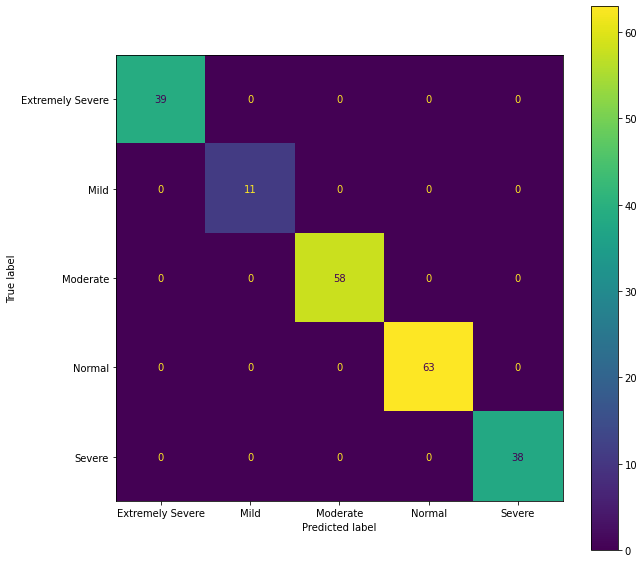

In [284]:
rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)
accu_ran=round(accuracy_score(y_test,rand.predict(X_test_scaled)),3)
f1_score_ran=round(f1_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Precision_ran=round(precision_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Recall_ran=round(recall_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_ran)
print('F1_Score:',f1_score_ran)
print('Recall_Score:',Precision_ran)
print('Precision_Score:',Recall_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(rand, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rand,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=rand.predict(X_test_scaled))
print(classification)

Decision Tree

Accuracy: 0.809
F1_Score: 0.808
Recall_Score: 0.813
Precision_Score: 0.809
Cross Validation Score: 0.8004807692307692
                  precision    recall  f1-score   support

Extremely Severe     0.8947    0.8718    0.8831        39
            Mild     0.3333    0.2727    0.3000        11
        Moderate     0.8431    0.7414    0.7890        58
          Normal     0.9206    0.9206    0.9206        63
          Severe     0.6458    0.8158    0.7209        38

        accuracy                         0.8086       209
       macro avg     0.7275    0.7245    0.7227       209
    weighted avg     0.8134    0.8086    0.8081       209



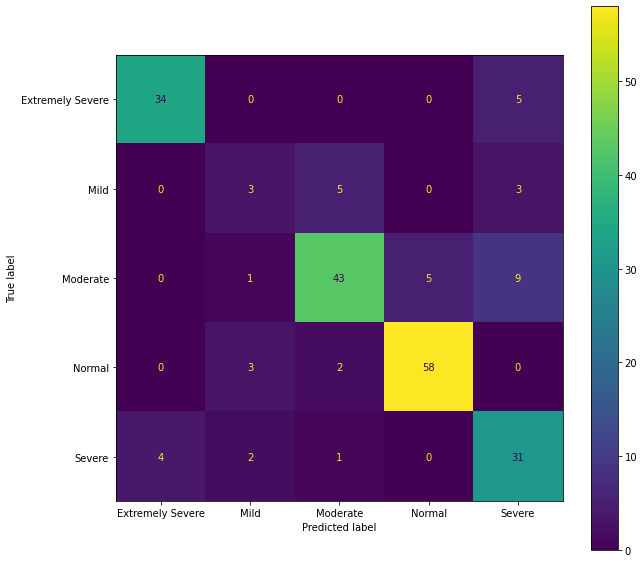

In [285]:
Dt=DecisionTreeClassifier(criterion='entropy',max_depth=100,min_samples_leaf=9,min_samples_split=3).fit(X_train_scaled,y_train)
accu_dt=round(accuracy_score(y_test,Dt.predict(X_test_scaled)),3)
f1_score_dt=round(f1_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Precision_dt=round(precision_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Recall_dt=round(recall_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_dt)
print('F1_Score:',f1_score_dt)
print('Recall_Score:',Precision_dt)
print('Precision_Score:',Recall_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(Dt, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Dt,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Dt.predict(X_test_scaled))
print(classification)

Gaussian Naive Bayes

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

Accuracy: 0.713
F1_Score: 0.759
Recall_Score: 0.91
Precision_Score: 0.713
Cross Validation Score: 0.7306089743589744
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000        39
            Mild     0.1746    1.0000    0.2973        11
        Moderate     0.9143    0.5517    0.6882        58
          Normal     1.0000    0.5079    0.6737        63
          Severe     0.8750    0.9211    0.8974        38

        accuracy                         0.7129       209
       macro avg     0.7928    0.7961    0.7113       209
    weighted avg     0.9100    0.7129    0.7595       209



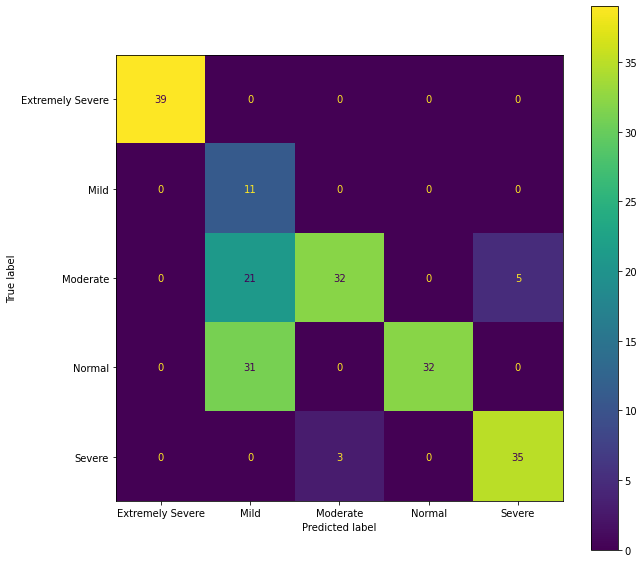

In [286]:
GB=GaussianNB().fit(X_train_scaled,y_train)
accu_gb=round(accuracy_score(y_test,GB.predict(X_test_scaled)),3)
f1_score_gb=round(f1_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
Precision_gb=round(precision_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
Recall_gb=round(recall_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_gb)
print('F1_Score:',f1_score_gb)
print('Recall_Score:',Precision_gb)
print('Precision_Score:',Recall_gb)
print('Cross Validation Score:',(np.mean(cross_val_score(GB, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(GB,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=GB.predict(X_test_scaled))
print(classification)

Nearest Neighbors

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0
Cross Validation Score: 0.9766025641025641
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000        39
            Mild     1.0000    1.0000    1.0000        11
        Moderate     1.0000    1.0000    1.0000        58
          Normal     1.0000    1.0000    1.0000        63
          Severe     1.0000    1.0000    1.0000        38

        accuracy                         1.0000       209
       macro avg     1.0000    1.0000    1.0000       209
    weighted avg     1.0000    1.0000    1.0000       209



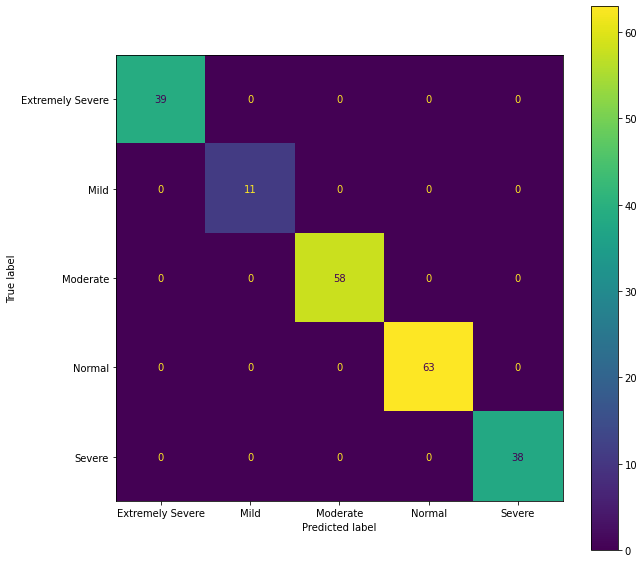

In [287]:
Knnr=KNeighborsClassifier(n_neighbors=19,weights='distance').fit(X_train_scaled,y_train)
accu_knn=round(accuracy_score(y_test,Knnr.predict(X_test_scaled)),3)
f1_score_knn=round(f1_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
Precision_knn=round(precision_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
Recall_knn=round(recall_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_knn)
print('F1_Score:',f1_score_knn)
print('Recall_Score:',Precision_knn)
print('Precision_Score:',Recall_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(Knnr, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Knnr,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Knnr.predict(X_test_scaled))
print(classification)

Support Vector Machines

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

Accuracy: 0.986
F1_Score: 0.986
Recall_Score: 0.987
Precision_Score: 0.986
Cross Validation Score: 0.9740384615384615
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000        39
            Mild     1.0000    1.0000    1.0000        11
        Moderate     1.0000    0.9483    0.9735        58
          Normal     1.0000    1.0000    1.0000        63
          Severe     0.9268    1.0000    0.9620        38

        accuracy                         0.9856       209
       macro avg     0.9854    0.9897    0.9871       209
    weighted avg     0.9867    0.9856    0.9857       209



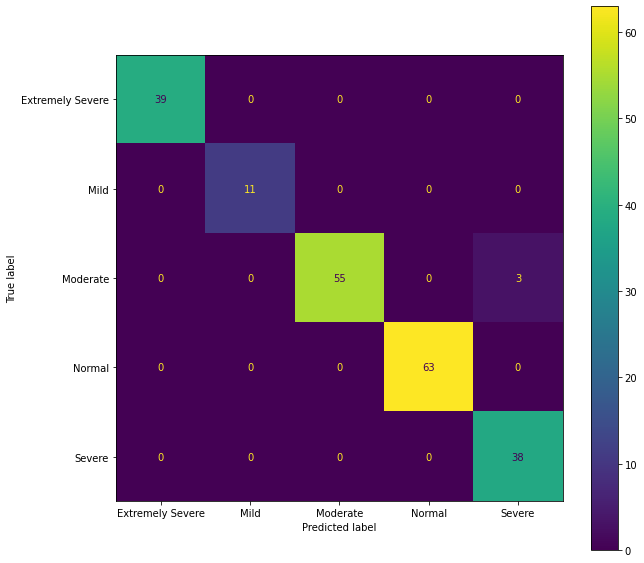

In [288]:
Svmc=SVC(C=10,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
accu_svm=round(accuracy_score(y_test,Svmc.predict(X_test_scaled)),3)
f1_score_svm=round(f1_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Precision_svm=round(precision_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Recall_svm=round(recall_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_svm)
print('F1_Score:',f1_score_svm)
print('Recall_Score:',Precision_svm)
print('Precision_Score:',Recall_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svmc, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Svmc,X_test_scaled,y_test,ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svmc.predict(X_test_scaled))
print(classification)

In [289]:
Result_2={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[accu_ran*100,accu_dt*100,accu_gb*100,accu_knn*100,accu_svm*100],
                  'F1_Score(%)':[f1_score_ran*100,f1_score_dt*100,f1_score_gb*100,f1_score_knn*100,f1_score_svm*100],
                  'Precision(%)':[Precision_ran*100,Precision_dt*100,Precision_gb*100,Precision_knn*100,Precision_svm*100],
                  'Recall(%)':[Recall_ran*100,Recall_dt*100,Recall_gb*100,Recall_knn*100,Recall_svm*100]
        
                    }
Result_Anxiety=pd.DataFrame(Result_2)



Results Achieved from above Modellings




In [290]:
Result_Depression

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,100.0,100.0,100.0,100.0
1,Decision-Tree,94.5,94.3,94.5,94.5
2,GaussianNB,89.9,90.1,92.2,89.9
3,Nearest-Neighbors,89.4,89.4,89.3,89.4
4,SVM,100.0,100.0,100.0,100.0


In [291]:
Result_Stress

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,98.1,98.2,98.4,98.1
1,Decision-Tree,83.7,84.1,85.8,83.7
2,GaussianNB,85.2,85.8,87.9,85.2
3,Nearest-Neighbors,89.0,89.4,90.2,89.0
4,SVM,84.7,80.0,83.5,84.7


In [292]:
Result_Anxiety

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,100.0,100.0,100.0,100.0
1,Decision-Tree,80.9,80.8,81.3,80.9
2,GaussianNB,71.3,75.9,91.0,71.3
3,Nearest-Neighbors,100.0,100.0,100.0,100.0
4,SVM,98.6,98.6,98.7,98.6


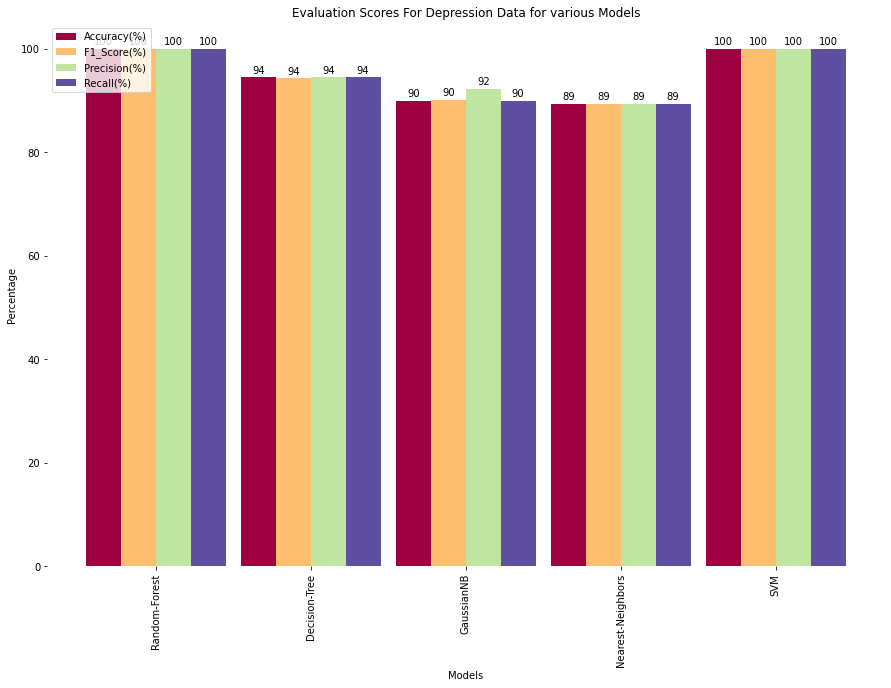

In [303]:
splot=Result_Depression.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Spectral',width=0.9)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0,7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Depression Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.legend(loc='upper left')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

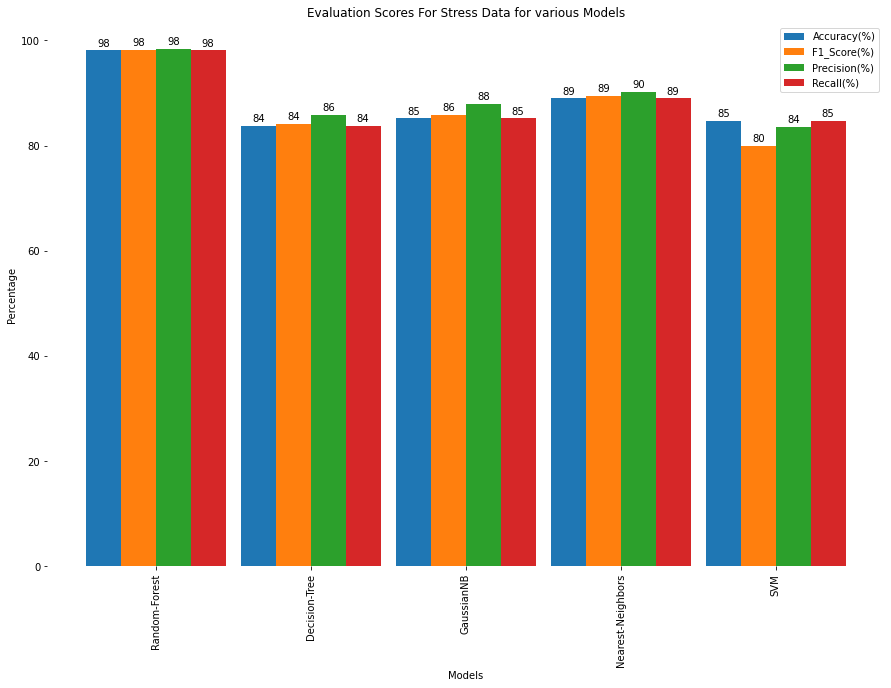

In [294]:
slot=Result_Stress.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Stress Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

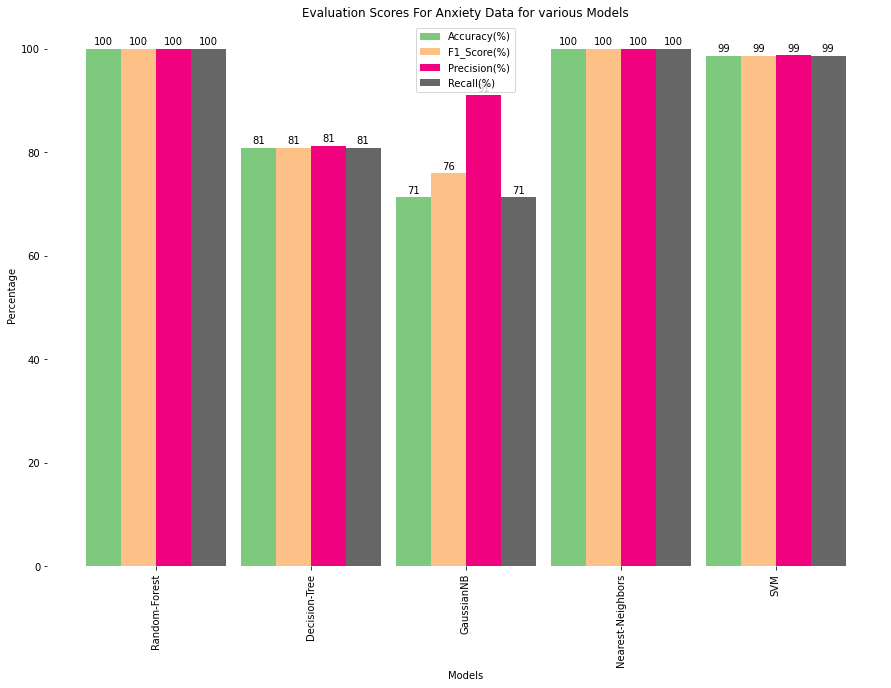

In [295]:
slot=Result_Anxiety.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Accent',width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Anxiety Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

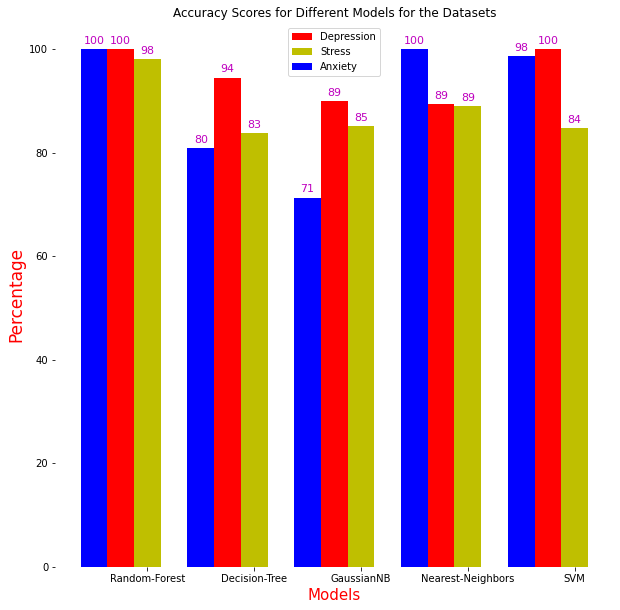

In [296]:
x=['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM']
widt=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Accuracy(%)'],widt,color='r')
bar2=plt.bar(X+widt,Result_Stress['Accuracy(%)'],widt,color='y')
bar3=plt.bar(X-widt,Result_Anxiety['Accuracy(%)'],widt,color='b')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
plt.xticks(X+widt,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Accuracy Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

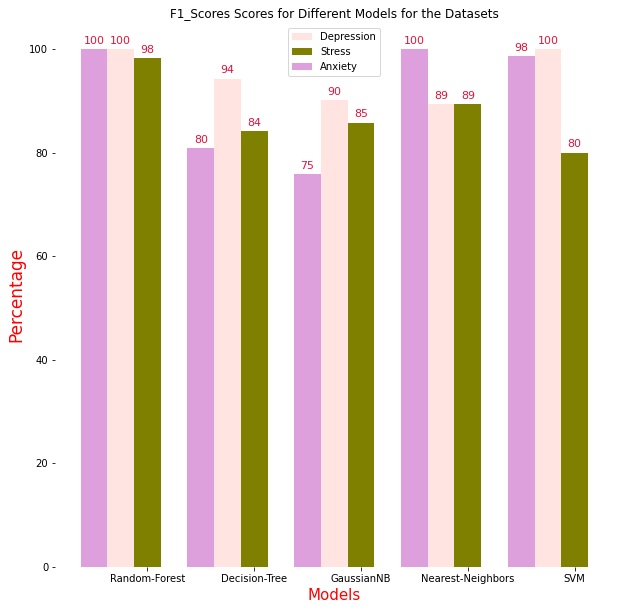

In [297]:
x=['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['F1_Score(%)'],width,color='mistyrose')
bar2=plt.bar(X+width,Result_Stress['F1_Score(%)'],width,color='olive')
bar3=plt.bar(X-width,Result_Anxiety['F1_Score(%)'],width,color='plum')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('F1_Scores Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

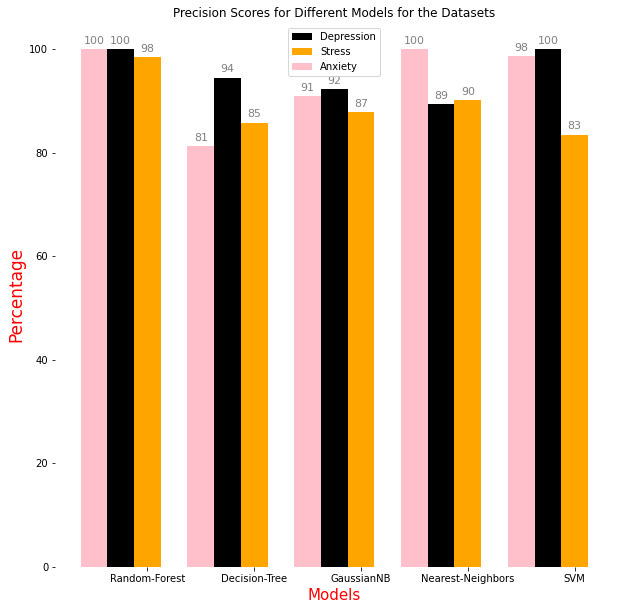

In [298]:
x=['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Precision(%)'],width,color='black')
bar2=plt.bar(X+width,Result_Stress['Precision(%)'],width,color='orange')
bar3=plt.bar(X-width,Result_Anxiety['Precision(%)'],width,color='pink')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Precision Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

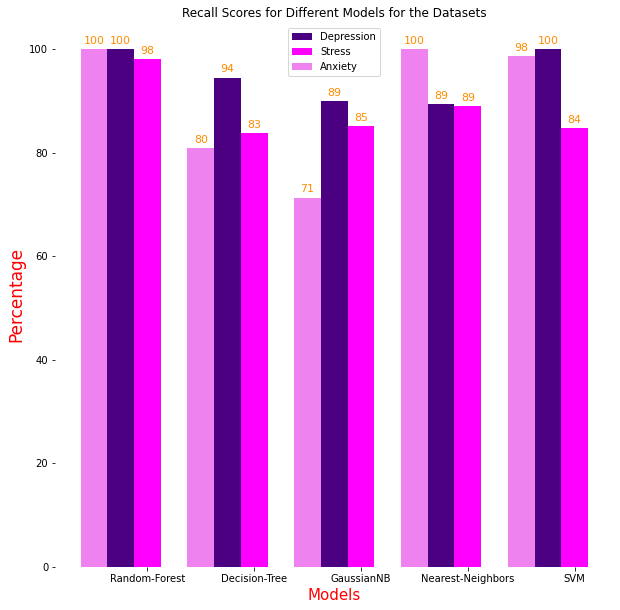

In [299]:
x=['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Recall(%)'],width,color='indigo')
bar2=plt.bar(X+width,Result_Stress['Recall(%)'],width,color='magenta')
bar3=plt.bar(X-width,Result_Anxiety['Recall(%)'],width,color='violet')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Recall Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()